# APS 8

Entrega: 28/11 ao final do atendimento (17:15)

## Questão 1

Assuma que $X$ seja uma variável aleatória contínua que descreve o preço de um multímetro digital em uma loja brasileira qualquer. Ainda, assuma que o preço médio seja igual a $R\$ 45,00$ e o desvio padrão, igual a $R\$ 25,00$.

Em todos os itens a seguir, deixe claro como foi construído o novo preço em função de $X$.

Deixe todas as contas claramente indicadas.

a) Se todas as lojas brasileiras que vendem multímetro resolvessem acrescentar 15 reais no preço de cada um dos seus respectivos multímetros. Nesse caso, qual o novo preço médio do multímetro e respectivo desvio padrão?

b) Se todas as lojas brasileiras que vendem multímetro resolvessem aumentar o preço de cada um dos seus respectivos multímetros em $150\%$. Nesse caso, qual o novo preço médio do multímetro e respectivo desvio padrão?

c) Se você precisa comprar dez multímetros e deseja comprá-los todos iguais e na mesma loja. Nesse caso, qual o gasto total esperado e respectivo desvio padrão?

In [96]:
#papel

## Questão 2

	
	
Assuma que, na disciplina Ciência dos dados, a nota final da disciplina seja função da nota média das provas $X$ e da nota média dos projetos $Y$. Assuma ainda que ambas as notas tem mesmo peso na construção da nota final na disciplina.


Considerando que a nota média dos alunos nas provas segue uma normal com média 4 e desvio padrão igual a 1,5, ou seja $ X \sim N(4 ; 2,25)$ . E que a nota média dos alunos nos projetos segue uma normal com média 7 e desvio padrão igual a 1, ou seja, $Y\sim N(7 ; 1)$.


Na prática, é razoável acreditar que haja uma associação positiva entre essas notas. Aqui, considere que a covariância entre essas notas médias é igual a $0,675$ .

Em todos os itens a seguir, deixe todas as contas claramente indicadas. 


a) Calcule a nota média final e respectivo desvio padrão.
   
 b) Considere que a nota final na disciplina Ciência dos dados segue uma distribuição com média e variância obtidas no item anterior.      Calcule a probabilidade de um aluno ser aprovado na disciplina.


In [97]:
#A - papel
#b
mediacalculada=5.5
desviocalculado=1.07
mediainsper=5
probabilidade= (1-stats.norm.cdf(mediainsper,loc=mediacalculada,scale=desviocalculado))*100
print("a probabilidade é", probabilidade,'%' )

a probabilidade é 67.9853694704 %


### Dataset para as questões de programação

Vamos trabalhar com o problema *House Sales in King County*, do Kaggle
[https://www.kaggle.com/harlfoxem/housesalesprediction](https://www.kaggle.com/harlfoxem/housesalesprediction)

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats

%matplotlib inline

In [99]:
houses = pd.read_csv("casas.csv")

In [100]:
houses

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_basement,grade
0,540000.0,4,2.50,2600,9935,2.0,0,8
1,815000.0,3,3.75,2780,5002,2.0,0,10
2,279000.0,3,2.25,2070,7800,1.0,900,7
3,360000.0,2,2.50,1233,1244,2.0,270,7
4,309000.0,3,2.50,1990,3614,2.0,0,7
5,850000.0,5,2.25,3100,97661,2.0,0,9
6,455000.0,3,2.50,1870,7344,1.0,400,8
7,1280000.0,4,3.00,3260,4500,2.0,960,9
8,570000.0,4,1.00,1490,6000,1.5,0,7
9,905000.0,5,3.50,3100,10200,1.0,1440,9


## Q3

O dataset fornecido é uma amostra extraída de um dataset maior. A amostra pode ter vindo de uma população com média de `sqft_lot` de 8250? 

Passos:

**a)** Verifique que `sqft_lot` **não** é normal.

Dica: na *APS 7* foi feito um teste de normalidade. Repita o mesmo processo

**b)**  Se `sqft_lot` fosse normal, que tipo de teste poderíamos ter usado?

**c)** Saberíamos $\mu$ para montar o t? Saberíamos $\sigma$?


**Bootstrap**:

**d)** Monte um intervalo percentil boostrap de $95\%$.

**e)** Informe os valores inferiores e superiores

**f)** Conclua o teste


[]

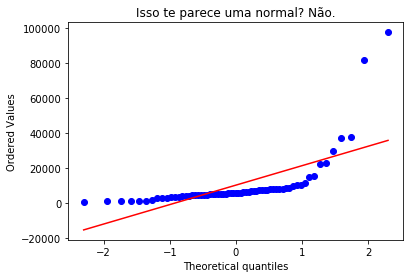

In [101]:
#3a
a=houses.sqft_lot
stats.probplot(a, dist='norm', plot=plt)
plt.title("Isso te parece uma normal? Não.")
plt.plot()


In [44]:
#b
print("poderiamos ter feito um histograma.")

poderiamos ter feito um histograma.


In [45]:
#c 
print ("o μ saberiamos para montar o t, mas o σ não.")

o μ saberiamos para montar o t, mas o σ não.


In [33]:
#d
#e
n=len(a)
xbarra = np.mean(a)
dp = np.std(a,ddof=1)

print("Média: ", xbarra)
print("Desvio padrão amostral: ", dp)


Média:  10292.538461538461
Desvio padrão amostral:  16122.868507454057


In [91]:
xbarra_Boot = []

l= 123456
for i in range(l):
    amostra = np.random.choice(dados, size=n, replace=True)
    xbarraB = np.mean(amostra)
    xbarra_Boot.append(xbarraB)
inferior = np.percentile(xbarra_Boot, 2.5)
superior = np.percentile(xbarra_Boot, 97.5)
print('Limite inferior:', inferior)
print('Limite superior:', superior)    

Limite inferior: 6916.88461538
Limite superior: 14625.5269231


In [92]:

#f) Conclua o teste
print("o valor 8250 está entre",inferior, "e", superior,", portanto pode ter vindo dessa amostra ")


o valor 8250 está entre 6916.88461538 e 14625.5269231 , portanto pode ter vindo dessa amostra 


## Q4

Faça uma regressão que usa `sqft_living` como variável explicativa  e `price` como resultado: 

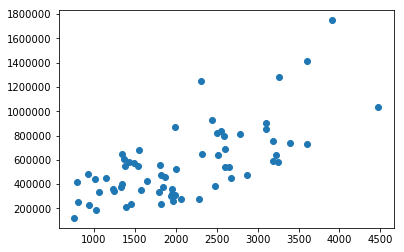

In [86]:
livi=houses.sqft_living
prec=houses.price
p = plt.plot(livi,prec, 'o')

**a).** De acordo com a notação que usamos em aula, quem é $\hat{\beta_0}$ e quem é $\hat{\beta_1}$ ?

In [55]:

import statsmodels.api as sm

Y = houses.price
X = houses.sqft_living
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.472
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                     56.21
Date:                Tue, 28 Nov 2017   Prob (F-statistic):           2.70e-10
Time:                        15:35:26   Log-Likelihood:                -892.24
No. Observations:                  65   AIC:                             1788.
Df Residuals:                      63   BIC:                             1793.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        4.928e+04   7.44e+04      0.662      0.510   -9.95e+04    1.98e+05
sqft_living   247.0810     32.954      7.498      0.000     181.227     312.935
==============================================================================
Omnibus:                       12.716   Durbin-Watson:                   1.643
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               13.432
Skew:                           0.973   Prob(JB):                      0.00121
Kurtosis:                       4.081   Cond. No.                     6.03e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.03e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [94]:
B0= 4.928e+04# coef x const
B1 = 247.0810 # coef x sqft_living
print("B0 é", B0, 'e B1 é', B1)

B0 é 49280.0 e B1 é 247.081


**b).** Interprete o $R^2$ , os valores $P > |t|$ e também *Prob (F-statistic)*.

In [105]:
print ('R2 é o valor da linha de tendência, que é 0.463, sendo um pouco disperso, indica que há uma certa dispersão a essa linha. P>|t| é um nivel que fala se a amostra pode ou nao ser rejeitada. Nesse caso nao deve ser rejeitada. O Prob (F-statistic)é um valor muito pequeno (2.70e-10), ou seja, é significativo.')

R2 é o valor da linha de tendência, que é 0.463, sendo um pouco disperso, indica que há uma certa dispersão a essa linha. P>|t| é um nivel que fala se a amostra pode ou nao ser rejeitada. Nesse caso nao deve ser rejeitada. O Prob (F-statistic)é um valor muito pequeno (2.70e-10), ou seja, é significativo.


**c).** Escreva a equação que expressa `price` em função de `sqft_living`.



In [85]:
#linha coef
print("y= 4.928e+04 + 247.0810x")

y= 4.928e+04 + 247.0810x


**d).** Faça um gráfico de dispersão de `price` em função de `sqft_living`, plote a equação que encontrou no item anterior no mesmo gráfico


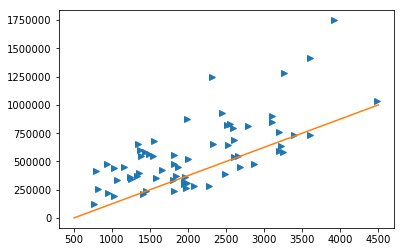

In [89]:
p = plt.plot(livi,prec, '>')
plt.plot((500,4500),(172.820,1000000))# plotando a linha

## Q5

Faça agora uma regressão múltipla que tenta prever `price` (variável explicada) em função das variáveis `sqft_lot`  e `sqft_basement` (explicativa).

Dica: inclua as duas colunas dentro de uma variável `X`, o restante não se altera em relação à regressão simples.


```python
Y = houses['price']
X = houses.loc[:, ['sqft_lot', 'sqft_basement']]
```

Pede-se:

**a).** Repita a intepretação dos valores $P > |t|$ e Prob (F-statistic) porém com duas variáveis.

O que os valores encontrados implicam para a regressão?


**b).** Escreva a função que foi encontrada pela regressão ( `price` em função de  `sqft_lot`  e `sqft_basement`)

In [106]:
#a
Y = houses.price
X = houses.loc[:, ['sqft_lot', 'sqft_basement']]
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.9115
Date:                Tue, 28 Nov 2017   Prob (F-statistic):              0.407
Time:                        16:53:43   Log-Likelihood:                -912.03
No. Observations:                  65   AIC:                             1830.
Df Residuals:                      62   BIC:                             1837.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          5.237e+05   5.01e+04     10.462      0.000    4.24e+05    6.24e+05
sqft_lot          2.7668      2.383      1.161      0.250      -1.997       7.531
sqft_basement    68.6891    101.802      0.675      0.502    -134.810     272.188
==============================================================================
Omnibus:                       24.116   Durbin-Watson:                   1.833
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.221
Skew:                           1.369   Prob(JB):                     5.02e-09
Kurtosis:                       5.572   Cond. No.                     2.50e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.5e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [107]:
print("p>/t/ para const é 0, para pqft_log é 0.25 e para sqft_basement é 0.502. é uma hipótese Ok, nem muito boa e nem muito ruim")



p>/t/ para const é 0, para pqft_log é 0.25 e para sqft_basement é 0.502. é uma hipótese Ok, nem muito boa e nem muito ruim


In [108]:
# y é a coluna do coef
print(" Y= 5.237e+05 + 2.7668*x1 +68.6891*x2" )

 Y= 5.237e+05 + 2.7668*x1 +68.6891*x2
